# Adaptive Boosting Algorithm (AdaBoost Algorithm)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("../DATA/mushrooms.csv")

In [3]:
df.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


In [25]:
df.shape

(8124, 23)

In [8]:
# df.corr()['class'].sort_values()

In [7]:
# sns.heatmap(df.corr(), annot=True)

In [12]:
df.describe().transpose().reset_index().sort_values('unique')

,index,count,unique,top,freq
16,veil-type,8124,1,p,8124
0,class,8124,2,e,4208
4,bruises,8124,2,f,4748
6,gill-attachment,8124,2,f,7914
7,gill-spacing,8124,2,c,6812
8,gill-size,8124,2,b,5612
10,stalk-shape,8124,2,t,4608
18,ring-number,8124,3,o,7488
2,cap-surface,8124,4,y,3244
17,veil-color,8124,4,w,7924


In [13]:
unique_features = df.describe().transpose().reset_index().sort_values('unique')

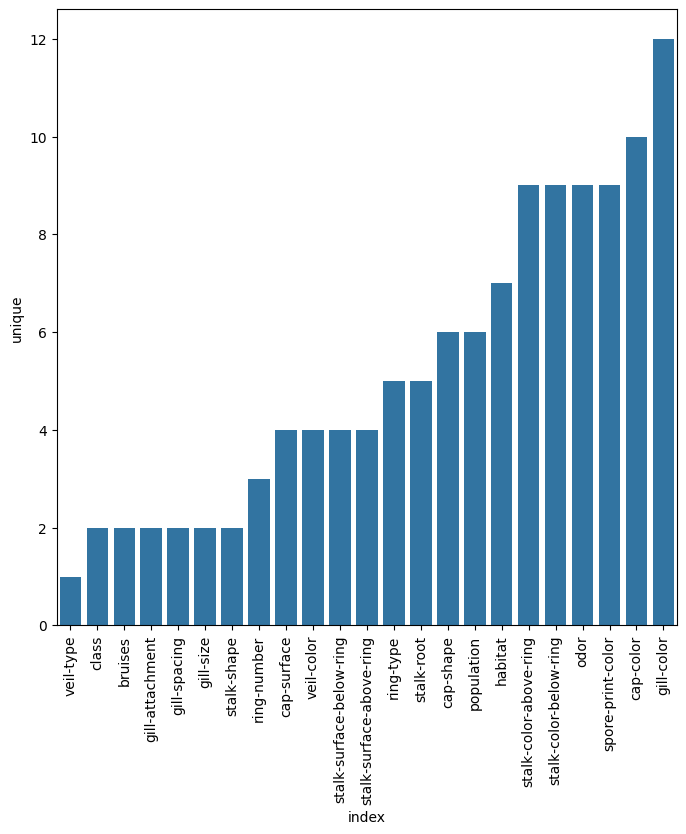

In [17]:
plt.figure(figsize=(8,8), dpi=100)
sns.barplot(data=unique_features, x='index', y='unique')
plt.xticks(rotation=90)
plt.show()

In [18]:
X = df.drop("class", axis=1)

In [19]:
X.isna().sum()

cap-shape                   0
cap-surface                 0
cap-color                   0
bruises                     0
odor                        0
gill-attachment             0
gill-spacing                0
gill-size                   0
gill-color                  0
stalk-shape                 0
stalk-root                  0
stalk-surface-above-ring    0
stalk-surface-below-ring    0
stalk-color-above-ring      0
stalk-color-below-ring      0
veil-type                   0
veil-color                  0
ring-number                 0
ring-type                   0
spore-print-color           0
population                  0
habitat                     0
dtype: int64

In [20]:
X = pd.get_dummies(X, drop_first=True, dtype=int)

In [27]:
y = df['class']

In [21]:
X.head()

,cap-shape_c,cap-shape_f,cap-shape_k,cap-shape_s,cap-shape_x,cap-surface_g,cap-surface_s,cap-surface_y,cap-color_c,cap-color_e,...,population_n,population_s,population_v,population_y,habitat_g,habitat_l,habitat_m,habitat_p,habitat_u,habitat_w
0,0,0,0,0,1,0,1,0,0,0,...,0,1,0,0,0,0,0,0,1,0
1,0,0,0,0,1,0,1,0,0,0,...,1,0,0,0,1,0,0,0,0,0
2,0,0,0,0,0,0,1,0,0,0,...,1,0,0,0,0,0,1,0,0,0
3,0,0,0,0,1,0,0,1,0,0,...,0,1,0,0,0,0,0,0,1,0
4,0,0,0,0,1,0,1,0,0,0,...,0,0,0,0,1,0,0,0,0,0


In [22]:
from sklearn.model_selection import train_test_split

In [28]:
# help(train_test_split)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [29]:
from sklearn.ensemble import AdaBoostClassifier

In [40]:
model = AdaBoostClassifier(n_estimators=1)  # n_estimators is no. of features that we provide to the model

In [41]:
model.fit(X_train, y_train)

,"estimator estimator: object, default=NoneThe base estimator from which the boosted ensemble is built.Support for sample weighting is required, as well as proper``classes_`` and ``n_classes_`` attributes. If ``None``, thenthe base estimator is :class:`~sklearn.tree.DecisionTreeClassifier`initialized with `max_depth=1`... versionadded:: 1.2 `base_estimator` was renamed to `estimator`.",None
,"n_estimators n_estimators: int, default=50The maximum number of estimators at which boosting is terminated.In case of perfect fit, the learning procedure is stopped early.Values must be in the range `[1, inf)`.",1
,"learning_rate learning_rate: float, default=1.0Weight applied to each classifier at each boosting iteration. A higherlearning rate increases the contribution of each classifier. There isa trade-off between the `learning_rate` and `n_estimators` parameters.Values must be in the range `(0.0, inf)`.",1.0
,"random_state random_state: int, RandomState instance or None, default=NoneControls the random seed given at each `estimator` at eachboosting iteration.Thus, it is only used when `estimator` exposes a `random_state`.Pass an int for reproducible output across multiple function calls.See :term:`Glossary `.",None


In [42]:
y_preds = model.predict(X_test)

In [43]:
from sklearn.metrics import classification_report

In [44]:
print(classification_report(y_test, y_preds))

              precision    recall  f1-score   support

           e       0.96      0.80      0.87      1274
           p       0.81      0.96      0.88      1164

    accuracy                           0.88      2438
   macro avg       0.89      0.88      0.88      2438
weighted avg       0.89      0.88      0.88      2438



In [45]:
model.feature_importances_

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [46]:
# This will return the column index were the 1 is
model.feature_importances_.argmax()

np.int64(22)

In [47]:
X.columns[22]

'odor_n'

In [48]:
from sklearn.metrics import accuracy_score

In [51]:
len(X.columns)

95

In [54]:
error_rates = []

for n in range(1,96):
    model = AdaBoostClassifier(n_estimators=n)
    model.fit(X_train, y_train)
    y_preds = model.predict(X_test)

    error = 1 - accuracy_score(y_test, y_preds)

    error_rates.append(error)

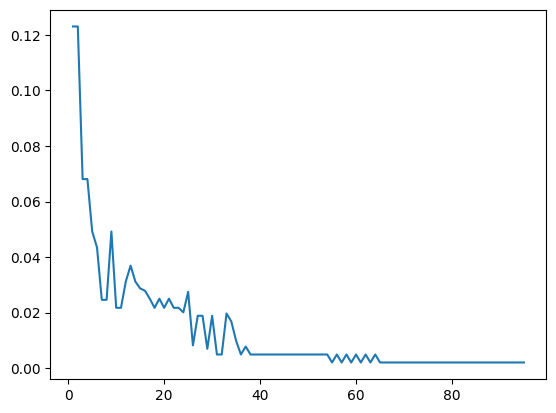

In [58]:
plt.plot(range(1, 96), error_rates)

In [59]:
from sklearn.model_selection import GridSearchCV

In [62]:
estimators = [x for x in range(1,96)]
param_grid = {
    'n_estimators': estimators
}

In [63]:
model_grid = GridSearchCV(estimator=model, param_grid=param_grid, cv=5)

In [64]:
model_grid.fit(X_train, y_train)

,"estimator estimator: estimator objectThis is assumed to implement the scikit-learn estimator interface.Either estimator needs to provide a ``score`` function,or ``scoring`` must be passed.",AdaBoostClass...estimators=95)
,"param_grid param_grid: dict or list of dictionariesDictionary with parameters names (`str`) as keys and lists ofparameter settings to try as values, or a list of suchdictionaries, in which case the grids spanned by each dictionaryin the list are explored. This enables searching over any sequenceof parameter settings.","{'n_estimators': [1, 2, ...]}"
,"scoring scoring: str, callable, list, tuple or dict, default=NoneStrategy to evaluate the performance of the cross-validated model onthe test set.If `scoring` represents a single score, one can use:- a single string (see :ref:`scoring_string_names`);- a callable (see :ref:`scoring_callable`) that returns a single value;- `None`, the `estimator`'s :ref:`default evaluation criterion ` is used.If `scoring` represents multiple scores, one can use:- a list or tuple of unique strings;- a callable returning a dictionary where the keys are the metric names and the values are the metric scores;- a dictionary with metric names as keys and callables as values.See :ref:`multimetric_grid_search` for an example.",None
,"n_jobs n_jobs: int, default=NoneNumber of jobs to run in parallel.``None`` means 1 unless in a :obj:`joblib.parallel_backend` context.``-1`` means using all processors. See :term:`Glossary `for more details... versionchanged:: v0.20 `n_jobs` default changed from 1 to None",None
,"refit refit: bool, str, or callable, default=TrueRefit an estimator using the best found parameters on the wholedataset.For multiple metric evaluation, this needs to be a `str` denoting thescorer that would be used to find the best parameters for refittingthe estimator at the end.Where there are considerations other than maximum score inchoosing a best estimator, ``refit`` can be set to a function whichreturns the selected ``best_index_`` given ``cv_results_``. In thatcase, the ``best_estimator_`` and ``best_params_`` will be setaccording to the returned ``best_index_`` while the ``best_score_``attribute will not be available.The refitted estimator is made available at the ``best_estimator_``attribute and permits using ``predict`` directly on this``GridSearchCV`` instance.Also for multiple metric evaluation, the attributes ``best_index_``,``best_score_`` and ``best_params_`` will only be available if``refit`` is set and all of them will be determined w.r.t this specificscorer.See ``scoring`` parameter to know more about multiple metricevaluation.See :ref:`sphx_glr_auto_examples_model_selection_plot_grid_search_digits.py`to see how to design a custom selection strategy using a callablevia `refit`.See :ref:`this example`for an example of how to use ``refit=callable`` to balance modelcomplexity and cross-validated score... versionchanged:: 0.20 Support for callable added.",True
,"cv cv: int, cross-validation generator or an iterable, default=NoneDetermines the cross-validation splitting strategy.Possible inputs for cv are:- None, to use the default 5-fold cross validation,- integer, to specify the number of folds in a `(Stratified)KFold`,- :term:`CV splitter`,- An iterable yielding (train, test) splits as arrays of indices.For integer/None inputs, if the estimator is a classifier and ``y`` iseither binary or multiclass, :class:`StratifiedKFold` is used. In allother cases, :class:`KFold` is used. These splitters are instantiatedwith `shuffle=False` so the splits will be the same across calls.Refer :ref:`User Guide ` for the variouscross-validation strategies that can be used here... versionchanged:: 0.22 ``cv`` default value if None changed from 3-fold to 5-fold.",5
,"verbose verbose: intControls the verbosity: the higher, the more messages.- >1 : the computation time for each fold and parameter candidate is displayed;- >2 : the score is also displayed;- >3 : the fold and candidate par

In [65]:
grid_preds = model_grid.predict(X_test)

In [66]:
model_grid.best_params_

{'n_estimators': 81}

In [67]:
model.feature_importances_

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.08510414, 0.1681533 ,
       0.03999727, 0.        , 0.08141   , 0.08411859, 0.01239741,
       0.01236484, 0.        , 0.02050354, 0.05705223, 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.01659159, 0.        , 0.        , 0.        , 0.        ,
       0.03760245, 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.02217973, 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.     

In [68]:
feats = pd.DataFrame(index=X.columns, data=model.feature_importances_, columns=['Importance'])

In [69]:
feats

,Importance
cap-shape_c,0.0
cap-shape_f,0.0
cap-shape_k,0.0
cap-shape_s,0.0
cap-shape_x,0.0
...,...
habitat_l,0.0
habitat_m,0.0
habitat_p,0.0
habitat_u,0.0


In [71]:
feat_importance = feats[feats['Importance']>0]

In [72]:
feat_importance

,Importance
odor_c,0.085104
odor_f,0.168153
odor_l,0.039997
odor_n,0.081410
odor_p,0.084119
odor_s,0.012397
odor_y,0.012365
gill-spacing_w,0.020504
gill-size_n,0.057052
stalk-shape_t,0.016592


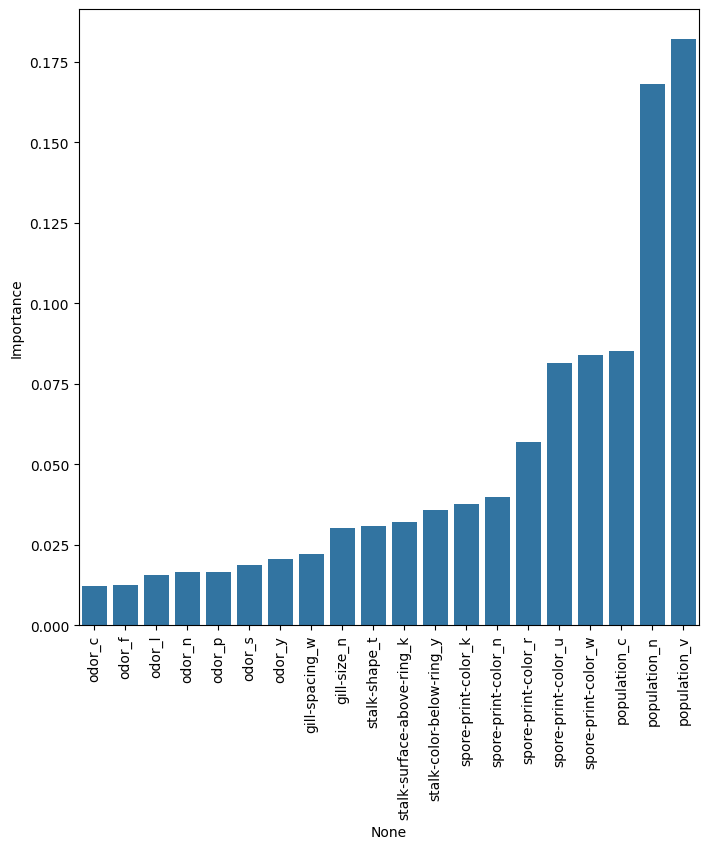

In [79]:
plt.figure(figsize=(8,8), dpi=100)

sns.barplot(data=feat_importance.sort_values('Importance'), x=feat_importance.index, y='Importance')
plt.xticks(rotation=90);

In [80]:
print(classification_report(y_test, grid_preds))

              precision    recall  f1-score   support

           e       1.00      1.00      1.00      1274
           p       1.00      1.00      1.00      1164

    accuracy                           1.00      2438
   macro avg       1.00      1.00      1.00      2438
weighted avg       1.00      1.00      1.00      2438



In [81]:
!git pull

Already up to date.


In [82]:
def save_to_github(commit_message):
    # Add
    !git add .

    # Commit
    !git commit -m f'{commit_message}'

    # Push
    !git push

In [83]:
save_to_github("AdaBoost Algorithm added")

[main bdf8db2] fAdaBoost Algorithm added
 1 file changed, 3319 insertions(+)
 create mode 100644 ML Algorithms/Boosting Methods.ipynb
Enumerating objects: 6, done.
Counting objects: 100% (6/6), done.
Delta compression using up to 8 threads
Compressing objects: 100% (4/4), done.
Writing objects: 100% (4/4), 99.37 KiB | 11.04 MiB/s, done.
Total 4 (delta 2), reused 0 (delta 0), pack-reused 0 (from 0)
remote: Resolving deltas: 100% (2/2), completed with 2 local objects.
To https://github.com/AbhinavKharde/ML-Learning-Journey.git
   71d7ccb..bdf8db2  main -> main


# Gradient Boosting Algorithm

In [4]:
df.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


In [5]:
X = df.drop('class', axis=1)
X = pd.get_dummies(X, drop_first=True, dtype=int)

In [6]:
y = df['class']

In [7]:
from sklearn.model_selection import train_test_split


In [10]:
# help(train_test_split)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=101)

In [11]:
from sklearn.ensemble import GradientBoostingClassifier

In [12]:
gb_model = GradientBoostingClassifier()

In [13]:
param_grid = {
    'n_estimators': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100],
    'learning_rate': [0.1, 0.2, 0.05, 0.06],
    'max_depth': [2, 3, 4, 5, 6]
}

In [14]:
from sklearn.model_selection import GridSearchCV

In [15]:
grid_model = GridSearchCV(gb_model, param_grid, cv=5)

In [16]:
grid_model.fit(X_train, y_train)

,"estimator estimator: estimator objectThis is assumed to implement the scikit-learn estimator interface.Either estimator needs to provide a ``score`` function,or ``scoring`` must be passed.",GradientBoostingClassifier()
,"param_grid param_grid: dict or list of dictionariesDictionary with parameters names (`str`) as keys and lists ofparameter settings to try as values, or a list of suchdictionaries, in which case the grids spanned by each dictionaryin the list are explored. This enables searching over any sequenceof parameter settings.","{'learning_rate': [0.1, 0.2, ...], 'max_depth': [2, 3, ...], 'n_estimators': [10, 20, ...]}"
,"scoring scoring: str, callable, list, tuple or dict, default=NoneStrategy to evaluate the performance of the cross-validated model onthe test set.If `scoring` represents a single score, one can use:- a single string (see :ref:`scoring_string_names`);- a callable (see :ref:`scoring_callable`) that returns a single value;- `None`, the `estimator`'s :ref:`default evaluation criterion ` is used.If `scoring` represents multiple scores, one can use:- a list or tuple of unique strings;- a callable returning a dictionary where the keys are the metric names and the values are the metric scores;- a dictionary with metric names as keys and callables as values.See :ref:`multimetric_grid_search` for an example.",None
,"n_jobs n_jobs: int, default=NoneNumber of jobs to run in parallel.``None`` means 1 unless in a :obj:`joblib.parallel_backend` context.``-1`` means using all processors. See :term:`Glossary `for more details... versionchanged:: v0.20 `n_jobs` default changed from 1 to None",None
,"refit refit: bool, str, or callable, default=TrueRefit an estimator using the best found parameters on the wholedataset.For multiple metric evaluation, this needs to be a `str` denoting thescorer that would be used to find the best parameters for refittingthe estimator at the end.Where there are considerations other than maximum score inchoosing a best estimator, ``refit`` can be set to a function whichreturns the selected ``best_index_`` given ``cv_results_``. In thatcase, the ``best_estimator_`` and ``best_params_`` will be setaccording to the returned ``best_index_`` while the ``best_score_``attribute will not be available.The refitted estimator is made available at the ``best_estimator_``attribute and permits using ``predict`` directly on this``GridSearchCV`` instance.Also for multiple metric evaluation, the attributes ``best_index_``,``best_score_`` and ``best_params_`` will only be available if``refit`` is set and all of them will be determined w.r.t this specificscorer.See ``scoring`` parameter to know more about multiple metricevaluation.See :ref:`sphx_glr_auto_examples_model_selection_plot_grid_search_digits.py`to see how to design a custom selection strategy using a callablevia `refit`.See :ref:`this example`for an example of how to use ``refit=callable`` to balance modelcomplexity and cross-validated score... versionchanged:: 0.20 Support for callable added.",True
,"cv cv: int, cross-validation generator or an iterable, default=NoneDetermines the cross-validation splitting strategy.Possible inputs for cv are:- None, to use the default 5-fold cross validation,- integer, to specify the number of folds in a `(Stratified)KFold`,- :term:`CV splitter`,- An iterable yielding (train, test) splits as arrays of indices.For integer/None inputs, if the estimator is a classifier and ``y`` iseither binary or multiclass, :class:`StratifiedKFold` is used. In allother cases, :class:`KFold` is used. These splitters are instantiatedwith `shuffle=False` so the splits will be the same across calls.Refer :ref:`User Guide ` for the variouscross-validation strategies that can be used here... versionchanged:: 0.22 ``cv`` default value if None changed from 3-fold to 5-fold.",5
,"verbose verbose: intControls the verbosity: the higher, the more messages.- >1 : the computation time for each fold and parameter candidate is displayed;- >2 : t

In [17]:
grid_preds = grid_model.predict(X_test)

In [18]:
from sklearn.metrics import classification_report, accuracy_score

In [19]:
print(classification_report(y_test, grid_preds))

              precision    recall  f1-score   support

           e       1.00      1.00      1.00       655
           p       1.00      1.00      1.00       564

    accuracy                           1.00      1219
   macro avg       1.00      1.00      1.00      1219
weighted avg       1.00      1.00      1.00      1219



In [21]:
grid_model.best_params_

{'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 100}

In [23]:
grid_model.best_estimator_

,"loss loss: {'log_loss', 'exponential'}, default='log_loss'The loss function to be optimized. 'log_loss' refers to binomial andmultinomial deviance, the same as used in logistic regression.It is a good choice for classification with probabilistic outputs.For loss 'exponential', gradient boosting recovers the AdaBoost algorithm.",'log_loss'
,"learning_rate learning_rate: float, default=0.1Learning rate shrinks the contribution of each tree by `learning_rate`.There is a trade-off between learning_rate and n_estimators.Values must be in the range `[0.0, inf)`.For an example of the effects of this parameter and its interaction with``subsample``, see:ref:`sphx_glr_auto_examples_ensemble_plot_gradient_boosting_regularization.py`.",0.1
,"n_estimators n_estimators: int, default=100The number of boosting stages to perform. Gradient boostingis fairly robust to over-fitting so a large number usuallyresults in better performance.Values must be in the range `[1, inf)`.",100
,"subsample subsample: float, default=1.0The fraction of samples to be used for fitting the individual baselearners. If smaller than 1.0 this results in Stochastic GradientBoosting. `subsample` interacts with the parameter `n_estimators`.Choosing `subsample < 1.0` leads to a reduction of varianceand an increase in bias.Values must be in the range `(0.0, 1.0]`.",1.0
,"criterion criterion: {'friedman_mse', 'squared_error'}, default='friedman_mse'The function to measure the quality of a split. Supported criteria are'friedman_mse' for the mean squared error with improvement score byFriedman, 'squared_error' for mean squared error. The default value of'friedman_mse' is generally the best as it can provide a betterapproximation in some cases... versionadded:: 0.18",'friedman_mse'
,"min_samples_split min_samples_split: int or float, default=2The minimum number of samples required to split an internal node:- If int, values must be in the range `[2, inf)`.- If float, values must be in the range `(0.0, 1.0]` and `min_samples_split` will be `ceil(min_samples_split * n_samples)`... versionchanged:: 0.18 Added float values for fractions.",2
,"min_samples_leaf min_samples_leaf: int or float, default=1The minimum number of samples required to be at a leaf node.A split point at any depth will only be considered if it leaves atleast ``min_samples_leaf`` training samples in each of the left andright branches. This may have the effect of smoothing the model,especially in regression.- If int, values must be in the range `[1, inf)`.- If float, values must be in the range `(0.0, 1.0)` and `min_samples_leaf` will be `ceil(min_samples_leaf * n_samples)`... versionchanged:: 0.18 Added float values for fractions.",1
,"min_weight_fraction_leaf min_weight_fraction_leaf: float, default=0.0The minimum weighted fraction of the sum total of weights (of allthe input samples) required to be at a leaf node. Samples haveequal weight when sample_weight is not provided.Values must be in the range `[0.0, 0.5]`.",0.0
,"max_depth max_depth: int or None, default=3Maximum depth of the individual regression estimators. The maximumdepth limits the number of nodes in the tree. Tune this parameterfor best performance; the best value depends on the interactionof the input variables. If None, then nodes are expanded untilall leaves are pure or until all leaves contain less thanmin_samples_split samples.If int, values must be in the range `[1, inf)`.",3
,"min_impurity_decrease min_impurity_decrease: float, default=0.0A node will be split if this split induces a decrease of the impuritygreater than or equal to this value.Values must be in the range `[0.0, inf)`.The weighted impurity decrease equation is the following:: N_t / N * (impurity - N_t_R / N_t * right_impurity - N_t_L / N_t * left_impurity)where ``N`` is the total number of samples, ``N_t`` is the number ofsamples at the current node, ``N_t_L`` is the number of samples in theleft child, and ``N_t_R`` is the number of samples in the right child.``N``, ``N_t``, 

In [24]:
grid_model.best_estimator_.feature_importances_


array([2.91150176e-04, 3.48452817e-16, 0.00000000e+00, 0.00000000e+00,
       4.67120093e-17, 1.04902579e-03, 1.18312069e-05, 1.27734798e-06,
       0.00000000e+00, 0.00000000e+00, 3.37015355e-17, 0.00000000e+00,
       4.17039480e-17, 0.00000000e+00, 0.00000000e+00, 2.14688986e-08,
       2.31055113e-03, 5.14269672e-02, 1.84253604e-04, 1.04472774e-02,
       1.82499853e-02, 1.83004109e-04, 6.14744334e-01, 3.94907433e-03,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 1.27312190e-02,
       1.08448951e-02, 0.00000000e+00, 4.19732175e-16, 4.57311570e-18,
       1.31454772e-17, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 9.59853083e-17, 2.06500911e-17,
       8.53758068e-04, 6.30425882e-06, 1.35970145e-01, 4.69032068e-03,
       4.03153100e-02, 4.64723214e-04, 2.59824622e-04, 4.95063766e-06,
       0.00000000e+00, 2.06974586e-03, 2.61715126e-02, 2.06343459e-03,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
      

In [25]:
feat_import = grid_model.best_estimator_.feature_importances_

In [26]:
imp_features = pd.DataFrame(index=X.columns, data=feat_import, columns=['Importance'])

In [34]:
imp_features = imp_features[imp_features['Importance']>0.0005]

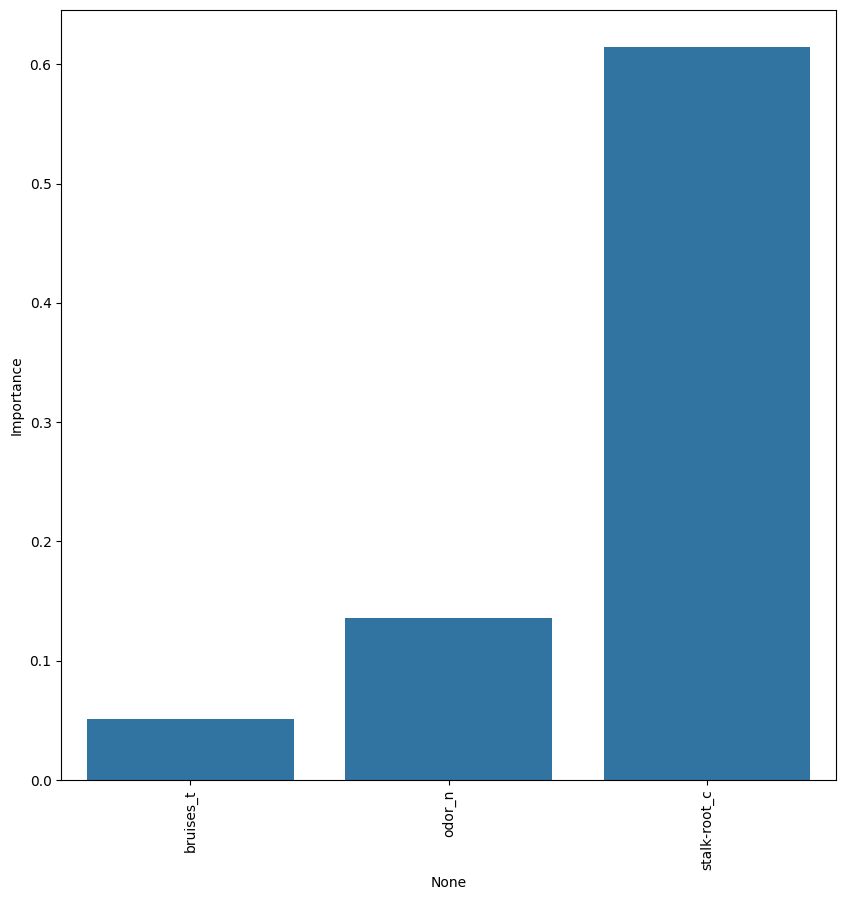

In [35]:
plt.figure(figsize=(10,10), dpi=100)
sns.barplot(data=imp_features.sort_values('Importance'), x=imp_features.index, y='Importance')
plt.xticks(rotation=90);